In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Advertising.csv')
X=df.drop('sales',axis=1)
y=df['sales']

# polynomial features (degree=3)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_converter=PolynomialFeatures(degree=3, include_bias=False)
poly_features=poly_converter.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# standardization or Z_score

# هدف:
### 1.اعداد در بازه های متفاوت را به بازه 0-1منتقل می کند(بازه میلیارد در مقابل صدگان)
### 2.برای داده هایی که واحدهای متفاوتی دارند مناسب است چون داده ها را بی واحد میکند(واحد متر مربع در مقابل تعداد اتاق)
### 3.در بحث گرادیان نزولی باعث همگرایی سریع تر و کاهش دورهای اجرا گرادیان برای اعداد بزرگتر می شود

# نکته:
### fit فقط بر روی داده های آموزش باید انجام شود در غیر اینصورت باعث نشت اطلاعات می شود
### داده های تست و حتی داده های جدید هم باید transform شوند

In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_s=scaler.transform(X_train)

In [21]:
X_test_s=scaler.transform(X_test)

In [23]:
X_train_s[: ,0].mean()

-5.963483675129412e-16

In [25]:
X_train_s[: ,0].std()

1.0

# Ridge Regression(L2)

#### با افزایش سوگیری از overfitشدن مدل جلوگیری می کند

In [1]:
from sklearn.linear_model import Ridge

In [43]:
ridge_model=Ridge(alpha=10)

In [45]:
ridge_model.fit(X_train_s , y_train)

Ridge(alpha=10)

In [47]:
test_predict= ridge_model.predict(X_test_s)

In [49]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [51]:
MAE=mean_absolute_error(y_test , test_predict)
MAE

0.5774404204714177

In [35]:
train_predict=ridge_model.predict(X_train_s)
MAE_train=mean_absolute_error(y_train , train_predict)
MAE_train

0.5288348183025332

In [37]:
RMSE=np.sqrt(mean_squared_error(y_test , test_predict))
RMSE

0.894638646131968

# RidgeCV (cross validation for alpha)

In [1]:
from sklearn.linear_model import RidgeCV

In [41]:
# sklearn.metrics.SCORERS.keys()
ridge_cv=RidgeCV(alphas=(0.1 , 1.0 , 10.0) , scoring='neg_mean_absolute_error')

In [43]:
ridge_cv.fit(X_train_s , y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [45]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

In [47]:
#best alpha
ridge_cv.alpha_

0.1

In [49]:
test_predict_cv=ridge_cv.predict(X_test_s)

In [51]:
MAE=mean_absolute_error(y_test , test_predict_cv)
MAE

0.42737748843373746

In [53]:
RMSE=np.sqrt(mean_squared_error(y_test , test_predict_cv))
RMSE

0.6180719926921404

In [55]:
train_predict=ridge_cv.predict(X_train_s)
MAE_train=mean_absolute_error(y_train , train_predict)
MAE_train

0.3094132105662787

In [80]:
ridge_cv.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

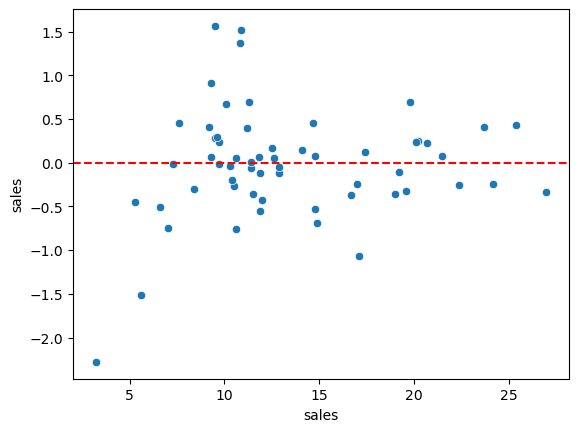

In [57]:
test_res=y_test - test_predict_cv
sns.scatterplot(x=y_test , y=test_res)
plt.axhline(y=0 , color='red' , ls='--')

<Axes: xlabel='sales', ylabel='Density'>

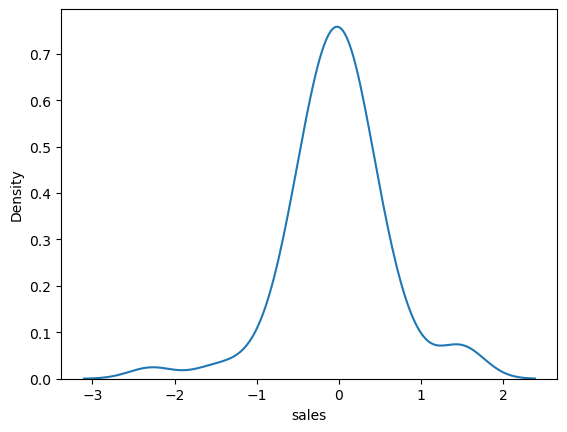

In [59]:
sns.kdeplot(test_res)

# Lasso Regression (L1)

In [3]:
from sklearn.linear_model import LassoCV

In [25]:
Lasso_cv_model=LassoCV(eps=0.1, n_alphas=100, cv=5 )# max_iter=100000000

In [27]:
Lasso_cv_model.fit(X_train_s , y_train)

LassoCV(cv=5, eps=0.1)

In [100]:
Lasso_cv_model.alphas_

array([4.94307091, 4.8294295 , 4.71840071, 4.60992447, 4.50394211,
       4.40039629, 4.29923099, 4.20039149, 4.10382431, 4.00947721,
       3.91729916, 3.82724029, 3.73925187, 3.65328631, 3.5692971 ,
       3.48723881, 3.40706704, 3.32873842, 3.25221058, 3.17744212,
       3.10439259, 3.03302247, 2.96329316, 2.89516692, 2.82860691,
       2.76357712, 2.70004236, 2.63796827, 2.57732127, 2.51806854,
       2.46017804, 2.40361844, 2.34835915, 2.29437027, 2.2416226 ,
       2.1900876 , 2.1397374 , 2.09054474, 2.04248303, 1.99552626,
       1.94964902, 1.90482651, 1.86103447, 1.8182492 , 1.77644758,
       1.73560697, 1.69570529, 1.65672096, 1.61863287, 1.58142043,
       1.54506351, 1.50954243, 1.47483799, 1.4409314 , 1.40780432,
       1.37543884, 1.34381745, 1.31292303, 1.28273887, 1.25324865,
       1.22443641, 1.19628656, 1.16878388, 1.14191349, 1.11566085,
       1.09001176, 1.06495234, 1.04046904, 1.01654862, 0.99317812,
       0.97034491, 0.94803664, 0.92624124, 0.90494691, 0.88414

In [102]:
Lasso_cv_model.alpha_

0.4943070909225828

In [29]:
test_predict_cv=Lasso_cv_model.predict(X_test_s)

In [53]:
MAE=mean_absolute_error(y_test , test_predict_cv)
MAE

0.6541723161252854

In [55]:
RMSE=np.sqrt(mean_squared_error(y_test , test_predict_cv))
RMSE

1.130800102276253

In [57]:
train_predict=Lasso_cv_model.predict(X_train_s)
train_MAE=mean_absolute_error(y_train , train_predict)
train_MAE

0.6912807140820695

In [112]:
Lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [118]:
# RMSElasso - RMSEridge
1.130800102276253 - 0.6180719926921404

0.5127281095841126

# Elastic Net

In [5]:
from sklearn.linear_model import ElasticNetCV

In [66]:
elastic_cv_model=ElasticNetCV(l1_ratio=[.1, .5 , .7 , .9 , .95 , .99 , 1] , tol=0.01)

In [68]:
elastic_cv_model.fit(X_train_s , y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [70]:
elastic_cv_model.l1_ratio_

1.0

In [72]:
test_predict_elastic=elastic_cv_model.predict(X_test_s)

In [74]:
MAE_elastic=mean_absolute_error(y_test , test_predict_elastic)
MAE_elastic

0.5663262117569448

In [76]:
RMSE_elastic=np.sqrt(mean_squared_error(y_test , test_predict_elastic))
RMSE_elastic

0.7485546215633724

In [78]:
train_predict_elastic=elastic_cv_model.predict(X_train_s)
MAE_train_elastic=mean_absolute_error(y_train , train_predict_elastic)
MAE_train_elastic

0.4307582990472369

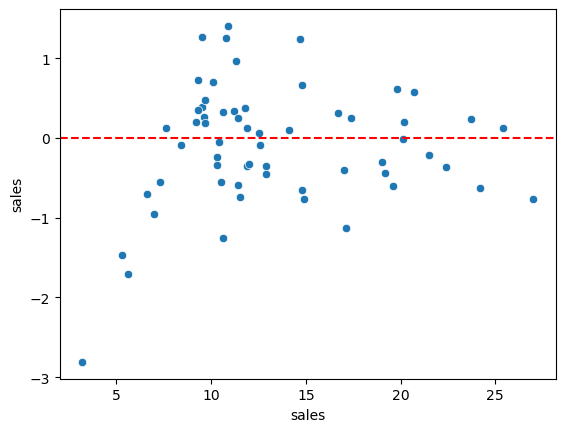

In [80]:
test_res_elastic=y_test - test_predict_elastic
sns.scatterplot(x=y_test , y=test_res_elastic)
plt.axhline(y=0 , color='red' , ls='--')

In [ ]:
sns.kd